### Mini batch

In [98]:
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass

@dataclass 
class Param:
    n =  60000
    n_test = int(n * 0.2)
    p = 2
    eps  = 0.5
    lr = None
    epochs = None


x = np.random.randn(Param.n,Param.p)
w = np.random.randn(Param.p)
e = np.random.randn(Param.n)
y = np.dot(x,w) + Param.eps * e

x_test = np.random.randn(Param.n_test,Param.p)
e_test = np.random.randn(Param.n_test)
y_test = np.dot(x_test,w) + Param.eps * e_test

In [99]:
def pred(x,w_hat):
    return np.dot(x,w_hat)
def loss(w_hat):
    return ((y - pred(x, w_hat)) ** 2).mean()
def test_loss(w_hat):
    return ((y_test - pred(x_test, w_hat)) ** 2).mean()
def grad(w_hat,idx=range(x.shape[0])):
    return np.dot(x[idx,:].T, pred(x[idx,:],w_hat)-y[idx])/len(idx)

# def gradient_descent(w_hat):
#     return w_hat - Param.lr * grad(w_hat)
def mini_batch_gradient_descent(w_hat,bs):
    shuffle = np.random.permutation(Param.n)
    for i in range(0,Param.n,bs):
        idx = shuffle[i:i+bs]
        w_hat = w_hat - Param.lr * (1+np.log(bs)) * grad(w_hat,idx)
    return w_hat
# def stochastic_gradient_descent(w_hat):
#     shuffle = np.random.permutation(Param.n)
#     for i in shuffle:
#         w_hat = w_hat - Param.lr * grad(w_hat,[i])
#     return w_hat

def update(batch_size):
    return lambda x:mini_batch_gradient_descent(x,batch_size)

In [100]:
from tqdm.notebook import tqdm

def train(update):
    w_hat = np.zeros(Param.p)
    para_history = []
    loss_history = []
    para_history.append(w_hat)
    loss_history.append(loss(w_hat))
    for i in range(Param.epochs):
        w_hat = update(w_hat)
        para_history.append(w_hat)
        loss_history.append(loss(w_hat))
        if (i+1) % 10 == 0:
            print('Epoch:',i+1,'Loss:',loss_history[-1])
    return para_history, loss_history

In [101]:
Param.lr = 0.00015
Param.epochs = 20

records = {}
batchsizes = [2**12, 2**9, 64, 8, 1]
for batch_size in batchsizes:
    print('Traning with batch size:',batch_size)
    records[batch_size] = train(update(batch_size))

Traning with batch size: 4096
Epoch: 10 Loss: 2.712769101535611
Epoch: 20 Loss: 1.8748228219285175
Traning with batch size: 512
Epoch: 10 Loss: 0.5431588734005497
Epoch: 20 Loss: 0.2718388609008632
Traning with batch size: 64
Epoch: 10 Loss: 0.2485601071155073
Epoch: 20 Loss: 0.24855758074385134
Traning with batch size: 8
Epoch: 10 Loss: 0.24857770506791949
Epoch: 20 Loss: 0.2485575567250587
Traning with batch size: 1
Epoch: 10 Loss: 0.24862089928500178
Epoch: 20 Loss: 0.24858879837570166


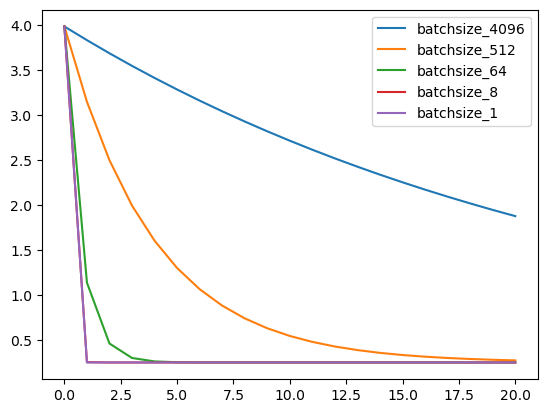

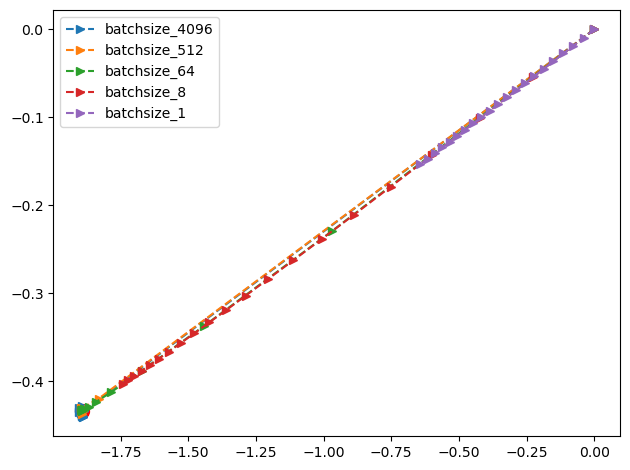

In [102]:
def eval(records,timed=False):
    if timed:
        epochs,phs,lhs,ts = zip(*records.values())
    else:
        phs,lhs = zip(*records.values()) 
    plt.subplots()
    for lh in lhs:
        plt.plot(lh)
    plt.legend([f'batchsize_{bs}' for bs in batchsizes])
    plt.show()

    for ph in reversed(phs):
        plt_axis = list(zip(*np.array(ph)))
        plt.plot(plt_axis[0],plt_axis[1],'-->')
    plt.scatter(w[0],w[1],s=100,c='r')
    if timed:
        plt.legend([f'batchsize_{bs}_epoch_{epoch}_timetotal_{th[-1]:.2f}' for bs,epoch,th in zip(reversed(batchsizes),reversed(epochs),reversed(ts))])
    else:
        plt.legend([f'batchsize_{bs}' for bs in batchsizes])
    plt.tight_layout()
    plt.show()

eval(records)

End to end optimal choice:

In [103]:
import time
# customized training function to set a convergence criterion
def is_convergent(loss_history,tol_round = 5):
    if len(loss_history) < tol_round+1:
        return False
    if loss_history[-1] <= min(loss_history[-1-tol_round:-1]):
        return False
    return True

def timed_auto_train(update):
    w_hat = np.zeros(Param.p)
    para_history = []
    loss_history = []
    time_stamps = []
    para_history.append(w_hat)
    loss_history.append(loss(w_hat))

    start = time.time()
    time_stamps.append(0)

    i = 0
    while True:
        w_hat = update(w_hat)
        para_history.append(w_hat)
        loss_history.append(loss(w_hat))
        if (i+1) % 10 == 0:
            print('Epoch:',i+1,'Loss:',loss_history[-1])
        i += 1
        time_stamps.append(time.time()-start)
        if is_convergent(loss_history):
            break

    return i, para_history, loss_history, time_stamps


In [104]:
timed_records = {}
batchsizes = [2**12, 2**9, 64, 8, 1]
for batch_size in batchsizes:
    print('Traning with batch size:',batch_size)
    timed_records[batch_size] = timed_auto_train(update(batch_size)) 


Traning with batch size: 4096
Epoch: 10 Loss: 2.712717519177198
Epoch: 20 Loss: 1.8747839090300356
Epoch: 30 Loss: 1.3216608991246133
Epoch: 40 Loss: 0.9568081911239842
Epoch: 50 Loss: 0.7159961007714052
Epoch: 60 Loss: 0.5571133599499082
Epoch: 70 Loss: 0.4522030663251878
Epoch: 80 Loss: 0.38295861299142475
Epoch: 90 Loss: 0.3372909319579218
Epoch: 100 Loss: 0.30712371882211703
Epoch: 110 Loss: 0.2872087430183387
Epoch: 120 Loss: 0.27406777575068825
Epoch: 130 Loss: 0.26539818928332365
Epoch: 140 Loss: 0.2596736723585628
Epoch: 150 Loss: 0.25589402534436106
Epoch: 160 Loss: 0.2534023093683509
Epoch: 170 Loss: 0.2517558906116032
Epoch: 180 Loss: 0.25067107562336366
Epoch: 190 Loss: 0.24995325827466033
Epoch: 200 Loss: 0.24947894032292423
Epoch: 210 Loss: 0.24916496703711427
Epoch: 220 Loss: 0.24895921511202873
Epoch: 230 Loss: 0.24882254983690927
Epoch: 240 Loss: 0.248732477730798
Epoch: 250 Loss: 0.24867313153791723
Epoch: 260 Loss: 0.2486338888475836
Epoch: 270 Loss: 0.24860812927104

KeyboardInterrupt: 

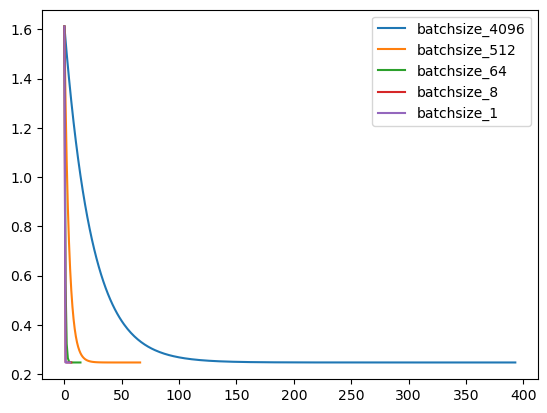

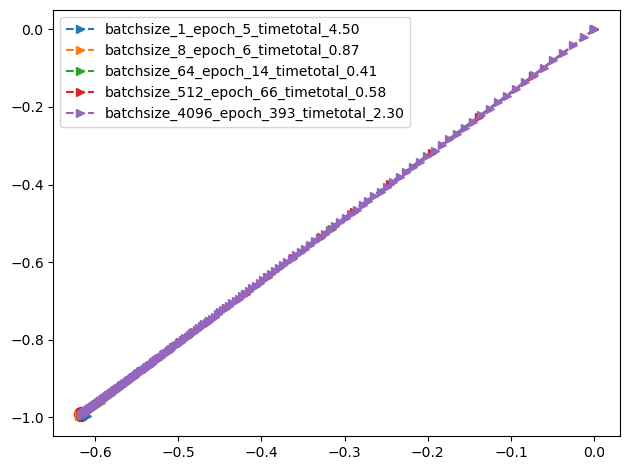

In [ ]:
eval(timed_records,timed=True)

In [ ]:
timed_records.items()

dict_items([(4096, (5, [array([0., 0.]), array([-0.00907271, -0.01482459]), array([-0.01804434, -0.0294414 ]), array([-0.02686621, -0.04383831]), array([-0.03554314, -0.05801604]), array([-0.04408008, -0.07197233])], [1.61162415990582, 1.5713610462012966, 1.5322217748151914, 1.4942624996762237, 1.4574494655595513, 1.4217551137519542], [0, 0.011049985885620117, 0.02095937728881836, 0.028638601303100586, 0.03822946548461914, 0.049254655838012695])), (512, (5, [array([0., 0.]), array([-0.06787687, -0.11081206]), array([-0.12831374, -0.20926191]), array([-0.18231287, -0.29684696]), array([-0.23004692, -0.37444136]), array([-0.27256802, -0.44341272])], [1.61162415990582, 1.3251895304931989, 1.098858040128751, 0.9196951337272051, 0.7787030506036324, 0.6672237875561964], [0, 0.01610112190246582, 0.031199216842651367, 0.08747458457946777, 0.10857295989990234, 0.14041376113891602])), (64, (5, [array([0., 0.]), array([-0.37214732, -0.60526335]), array([-0.51971684, -0.84203   ]), array([-0.57833

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(Param.p, 1)
    def forward(self, x):
        return self.linear(x)

model = LinearRegression()
criterion = nn.MSELoss()
X = torch.tensor(x, dtype=torch.float32)
Y = torch.tensor(y, dtype=torch.float32)

timed_records_torch = {}
for batch_size in batchsizes:
    print('Traning with batch size:',batch_size)
    
    optimizer = optim.SGD(model.parameters(), lr=Param.lr * batch_size ** 0.5)
    data_loader = torch.utils.data.DataLoader(list(zip(X,Y)), batch_size=batch_size, shuffle=True)
    loss_history = []
    start_time = time.time()
    epoch = 0
    while True:
        epoch += 1
        running_loss = 0 
        for batch in data_loader:
            x_batch, y_batch = batch        
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs.view(-1), y_batch)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()
        running_loss /= len(data_loader)
        loss_history.append(running_loss)
        if (epoch) % 10 == 0:
            print('Epoch:',epoch,'Loss:',running_loss)
        if is_convergent(loss_history):
            break
    end_time = time.time()
    timed_records_torch[batch_size] = epoch, end_time-start_time, loss_history

Traning with batch size: 4096
Epoch: 10 Loss: 0.25684307714303334
Traning with batch size: 512
Traning with batch size: 64
Traning with batch size: 8
Traning with batch size: 1


In [ ]:
epochs, time_spent, lh = zip(*timed_records_torch.values())

In [ ]:
for t in zip(batchsizes,epochs,time_spent):
    print(f'batchsize_{t[0]}_epoch_{t[1]}_timetotal_{t[2]:.2f}')

batchsize_4096_epoch_18_timetotal_5.09
batchsize_512_epoch_6_timetotal_1.98
batchsize_64_epoch_6_timetotal_4.84
batchsize_8_epoch_6_timetotal_25.94
batchsize_1_epoch_6_timetotal_185.16


Torch significantly slower than numpy

Multiple Gradient Descent Strategy